# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import torch
import random
from collections import deque
import matplotlib.pyplot as plt
import sys
import os
%matplotlib inline

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
#env = UnityEnvironment(file_name='/home/nkquynh/DRL/Reacher_Linux_20/Reacher_Linux/Reacher.x86_64')
#env = UnityEnvironment(file_name='/home/nkquynh/DRL/Reacher_Linux/Reacher.x86_64')

env = UnityEnvironment(file_name='/home/nkquynh/DRL/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Training the Agent

In the next code cell, the agent will be trained

In [5]:
from DDPG_Agent import DDPG_Agent
agent = DDPG_Agent(num_agents, state_size, action_size, random_seed = 0)

#!pip install progressbar
import progressbar as pb
widget1 = ['training loop ', pb.Counter(), ' : ', pb.Percentage(), ' ', 
          pb.Bar(), ' ', pb.ETA()]
widget2 = ['inner loop: ', pb.Percentage(), ' ', 
          pb.Bar(), ' ', pb.ETA()]
from IPython.display import clear_output

In [6]:
def DDPG_Learning(num_episode = 300, max_t = 1000):
    scores_windows = deque(maxlen = 100)
    scores_array = []
    print_every =  5
    timer1 = pb.ProgressBar(widgets=widget1, maxval=num_episode).start()
    #timer2 = pb.ProgressBar(widgets=widget2, maxval=max_t)
    #timer1.update(0)
    for i_episode in range(1, num_episode+1):
        
        #print('Episode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_windows))) 
        #timer2.start()
        #print('\r')
        timer1.update(i_episode)
        #print(i_episode)
        
        env_info = env.reset(train_mode=True)[brain_name]     # reset the environment    
        states = env_info.vector_observations                  # get the current state (for each agent)
        scores = np.zeros(num_agents)                          # initialize the score (for each agent)
        agent.reset()                                         # Important: Reset the noise value
        for t in range(max_t):
            #actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
            #actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
            actions = agent.act(states)
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            for i_agent in range(len(env_info.agents)):                      # update the network based on each agent
                agent.step(states[i_agent], actions[i_agent], rewards[i_agent], next_states[i_agent], dones[i_agent])
            
            scores += env_info.rewards                         # update the score (for each agent)
            states = next_states                               # roll over states to next time step
            #print(t)
            #timer2.update(t+1)
            if np.any(dones):                                  # exit loop if episode finished
                break
            
        #timer2.finish()
        avg_current_score = np.mean(scores)
        scores_windows.append(avg_current_score)
        scores_array.append(avg_current_score)
        if (i_episode % print_every == 0):
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            torch.save(scores_array, 'score.pth')
            torch.save(i_episode, 'i_episode')
            print('\rEpisode {}\tAverage Score: {:.2f}\t The current score: {:.2f}'.format(i_episode, np.mean(scores_windows),avg_current_score))   
        if (np.mean(scores_windows)>= 30.0):
            print('The environment is solved in {} steps and average score is: {}'.format(i_episode, np.mean(scores_windows)))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            break
        
        #timer1.update(i_episode)
        #clear_output(wait=True)
        #print('Episode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_windows)))
        #print('Episode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_windows)))  
    #timer2.finish()
    timer1.finish()
    return scores_array     

score = DDPG_Learning(max_t = 1000)


Episode 5	Average Score: 2.84	 The current score: 7.39


Episode 10	Average Score: 12.04	 The current score: 29.95


Episode 15	Average Score: 19.58	 The current score: 37.22


Episode 20	Average Score: 23.95	 The current score: 36.98


Episode 25	Average Score: 26.56	 The current score: 36.50


Episode 30	Average Score: 28.25	 The current score: 36.72


Episode 35	Average Score: 29.51	 The current score: 37.19


The environment is solved in 38 steps and average score is: 30.127157221342383


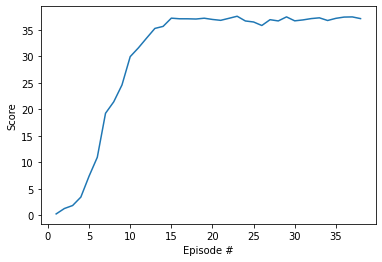

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(score)+1), score)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

When finished, you can close the environment.

In [11]:
env.close()

UnityEnvironmentException: No Unity environment is loaded.

### 4. Test the environment


In [1]:
from unityagents import UnityEnvironment
import numpy as np
import torch
import random
from collections import deque
import matplotlib.pyplot as plt
import sys
import os
%matplotlib inline
from DDPG_Agent import DDPG_Agent


env = UnityEnvironment(file_name='/home/nkquynh/DRL/Reacher_Linux_20/Reacher_Linux/Reacher.x86_64')
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
env_info = env.reset(train_mode=True)[brain_name]
# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)
# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]


agent_test = DDPG_Agent(num_agents, state_size, action_size, random_seed = 0)

if os.path.isfile('checkpoint_actor.pth'):
    agent_test.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
    agent_test.actor_target.load_state_dict(torch.load('checkpoint_actor.pth'))
    print("Loaded the previous saved actor network")
    
if os.path.isfile('checkpoint_critic.pth'):
    agent_test.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))
    agent_test.critic_target.load_state_dict(torch.load('checkpoint_critic.pth'))
    print("Loaded the previous saved critic network")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Number of agents: 20
Size of each action: 4
Loaded the previous saved actor network
Loaded the previous saved critic network


Episode 0	Average Score: 37.02	 The current score: 37.02
Episode 1	Average Score: 36.84	 The current score: 36.66
Episode 2	Average Score: 36.90	 The current score: 37.04
Episode 3	Average Score: 37.02	 The current score: 37.37
Episode 4	Average Score: 37.05	 The current score: 37.16
Episode 5	Average Score: 37.17	 The current score: 37.77
Episode 6	Average Score: 37.20	 The current score: 37.36
Episode 7	Average Score: 37.19	 The current score: 37.17
Episode 8	Average Score: 37.16	 The current score: 36.94
Episode 9	Average Score: 37.14	 The current score: 36.88
Episode 10	Average Score: 37.14	 The current score: 37.22
Episode 11	Average Score: 37.14	 The current score: 37.05
Episode 12	Average Score: 37.10	 The current score: 36.73
Episode 13	Average Score: 37.13	 The current score: 37.51
Episode 14	Average Score: 37.16	 The current score: 37.47
Episode 15	Average Score: 37.18	 The current score: 37.48
Episode 16	Average Score: 37.14	 The current score: 36.61
Episode 17	Average Score

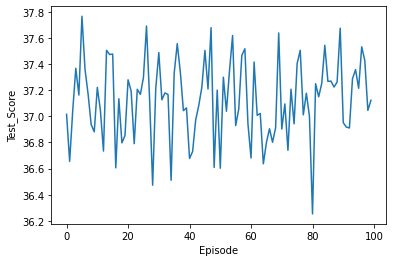

In [3]:
test_eps = 100
test_scores_array = []
for eps in range(test_eps):
    env_info = env.reset(train_mode=True)[brain_name] # reset the environment
    states = env_info.vector_observations            # get the current state
    test_scores = np.zeros(num_agents)               # initialize the score
    testing_steps = 1000
    agent_test.reset()
    for i in range(testing_steps):
        actions = agent_test.act(states)      # select an action
        env_info = env.step(actions)[brain_name]        # send the action to the environment
        next_states = env_info.vector_observations   # get the next state
        rewards = env_info.rewards                 # get the reward
        dones = env_info.local_done                  # see if episode has finished
        test_scores += rewards                           # update the score
        states = next_states                             # roll over the state to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    avg_current_score = np.mean(test_scores)
    test_scores_array.append(avg_current_score)
    print('\rEpisode {}\tAverage Score: {:.2f}\t The current score: {:.2f}'.format(eps, np.mean(test_scores_array),avg_current_score))

print("The average score is: {:.2f}".format(np.mean(test_scores_array)))
fig2 = plt.figure()
ax = fig2.add_subplot(111)
plt.plot(np.arange(test_eps), test_scores_array)
plt.ylabel('Test_Score')
plt.xlabel('Episode')
plt.show()

In [4]:
env.close()